In [1]:
import psycopg2

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
conn = psycopg2.connect(
    host='localhost',
    dbname='dvdrental',
    user='postgres',
    password='postgres',
    port=5432
)

In [15]:
with open('sql_queries/films.sql', encoding='utf8') as f:
    film_query = f.read()

In [16]:
films_df = pd.read_sql_query(film_query, conn)

In [17]:
films_df.sample(5)

,film_category,film_title,language,rentals
131,New,Angels Life,English,22
421,Horror,Lola Agent,English,24
413,Family,Odds Boogie,English,15
14,Horror,Fidelity Devil,English,21
610,Documentary,Bill Others,English,19


In [18]:
films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   film_category  958 non-null    object
 1   film_title     958 non-null    object
 2   language       958 non-null    object
 3   rentals        958 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 30.1+ KB


In [20]:
films_df.describe()

,rentals
count,958.000000
mean,16.747390
std,6.676185
min,4.000000
25%,11.000000
50%,16.000000
75%,22.000000
max,34.000000


In [22]:
# podsumowanie wypożyczeń filmów z poszczególnych kategorii
films_df.groupby('film_category').describe().round(2)

rentals                                           
                count   mean   std  min   25%   50%    75%   max
film_category                                                   
Action           61.0  18.23  5.96  8.0  14.0  18.0  23.00  30.0
Animation        64.0  18.22  6.38  6.0  14.0  19.0  22.25  32.0
Children         58.0  16.29  6.74  5.0  11.0  16.0  21.00  31.0
Classics         54.0  17.39  7.14  5.0  11.0  17.5  24.00  31.0
Comedy           56.0  16.80  6.33  5.0  13.0  16.5  21.25  31.0
Documentary      63.0  16.67  6.89  4.0  11.0  16.0  22.00  31.0
Drama            61.0  17.38  6.43  5.0  13.0  17.0  22.00  31.0
Family           67.0  16.36  6.38  5.0  12.0  16.0  20.00  31.0
Foreign          67.0  15.42  6.65  4.0  10.5  14.0  20.50  33.0
Games            58.0  16.71  7.23  5.0  11.0  16.0  22.00  32.0
Horror           53.0  15.96  6.73  4.0  11.0  16.0  22.00  30.0
Music            51.0  16.27  7.46  6.0   9.5  16.0  20.50  32.0
New              60.0  15.67  6.68  5.0   9.0  16.5  21.00  32.0
Sci-Fi           59.0  18.66  6.76  7.0  13.0  20.0  23.50  31.0
Sports           73.0  16.15  6.17  5.0  12.0  16.0  20.00  29.0
Travel           53.0  15.79  6.84  5.0  11.0  15.0  20.00  34.0

In [25]:
rentals_qty_per_category = (
    films_df
    .groupby('film_category', as_index=False)
    ['rentals']
    .sum()
)

In [28]:
rentals_qty_per_category.sort_values('rentals', ascending=False)

,film_category,rentals
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096
6,Drama,1060
5,Documentary,1050
8,Foreign,1033
9,Games,969
2,Children,945


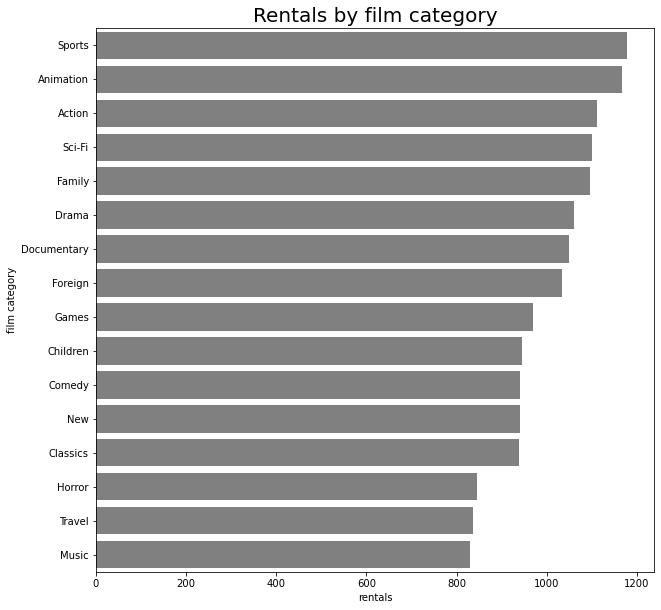

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    data=rentals_qty_per_category,
    x='rentals',
    y='film_category',
    order=rentals_qty_per_category.sort_values('rentals', ascending=False)['film_category'],
    color='gray'
)

plt.title('Rentals by film category', fontsize=20)

ax.set(xlabel='rentals', ylabel='film category')

plt.show()

In [ ]:
conn.close()